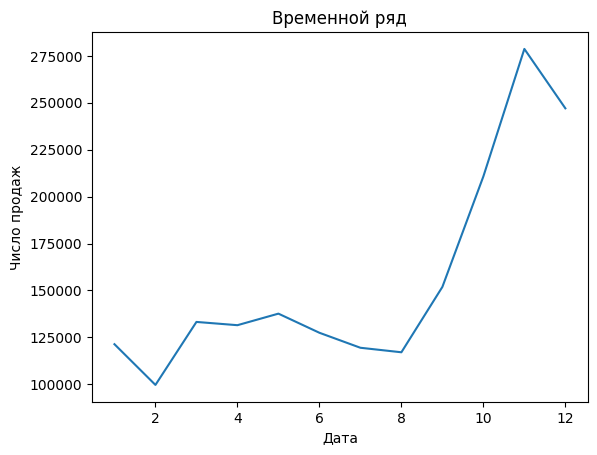

In [4]:
#месячный график
data = pd.read_csv("online_retail.csv")

data['date'] = pd.to_datetime(data['date'])

data = data.groupby(data['date'].dt.month)['total sales'].sum().reset_index()

plt.plot(data['date'], data["total sales"])
plt.xlabel("Дата")
plt.ylabel("Число продаж")
plt.title("Временной ряд")
plt.show()

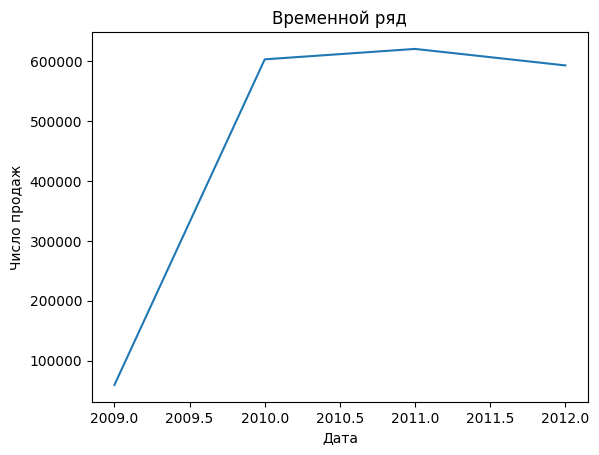

In [2]:
#годовой график
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("online_retail.csv")

data['date'] = pd.to_datetime(data['date'])

data = data.groupby(data['date'].dt.year)['total sales'].sum().reset_index()

plt.plot(data['date'], data["total sales"])
plt.xlabel("Дата")
plt.ylabel("Число продаж")
plt.title("Временной ряд")
plt.show()

Исходя из графиков видно, что продажи увеличиваются с 9го по 11й месяц каждого года, а также увеличиваются продажи до 2010 года, а затем наступает плато.

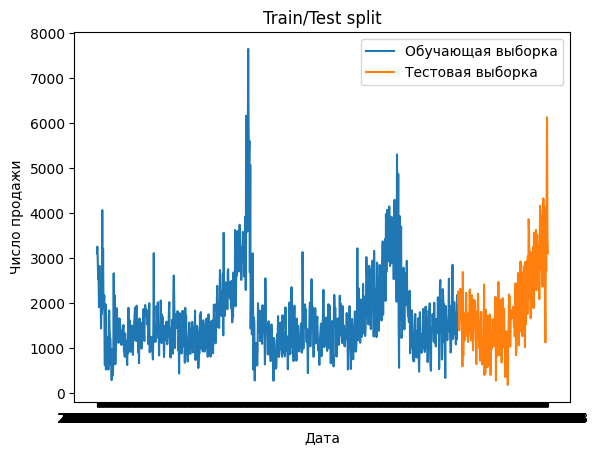

In [5]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("online_retail.csv")

# train/test split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# visual train/test split
plt.plot(train_data["date"], train_data["total sales"], label="Обучающая выборка")
plt.plot(test_data["date"], test_data["total sales"], label="Тестовая выборка")
plt.xlabel("Дата")
plt.ylabel("Число продажи")
plt.title("Train/Test split")
plt.legend()
plt.show()

**Бейзлайн**

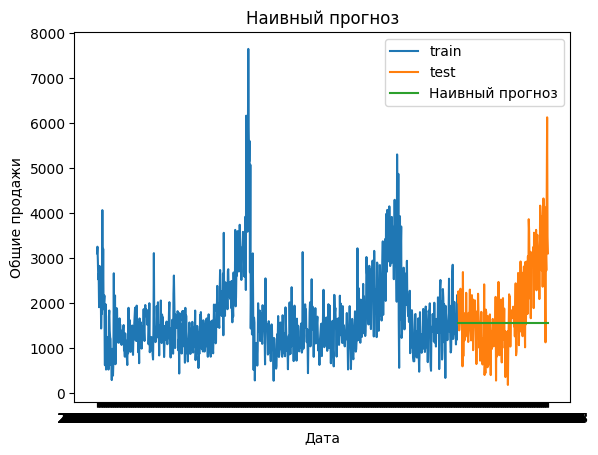

In [7]:
import numpy as np

data = pd.read_csv("online_retail.csv")

#бейзлайн в виде наивного прогноза
naive_forecast = np.repeat(train_data["total sales"].values[-1], len(test_data))

#визуализация
plt.plot(train_data["date"], train_data["total sales"], label="train")
plt.plot(test_data["date"], test_data["total sales"], label="test")
plt.plot(test_data["date"], naive_forecast, label="Наивный прогноз")
plt.xlabel("Дата")
plt.ylabel("Общие продажи")
plt.title("Наивный прогноз")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#метрика MSE
mse_metric = mean_squared_error(test_data["total sales"], naive_forecast)


print("Оценка скользящего среднего по метрике MSE:", mse_metric)


Оценка скользящего среднего по метрике MSE: 971724.8110583076


Высокая оценка скользящего среднего указывает на то, что наивный прогноз не очень точно предсказывает фактические значения.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax
from sklearn.model_selection import train_test_split

#загрузка данных
df = pd.read_csv('online_retail.csv')
data = df['total sales']

#разделение на train/test
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

#тест Дики-Фуллера
result = adfuller(train_data)
print("ADF статистика:", result[0])
print("p-value:", result[1])
print(result)


ADF статистика: -3.0495151022439986
p-value: 0.030521975094373203
(-3.0495151022439986, 0.030521975094373203, 20, 862, {'1%': -3.4379589097679975, '5%': -2.86489877693665, '10%': -2.568558467170181}, 13250.21513505042)


Тест Дики-Фуллера указывает на то, что временной ряд является стационарным. Статистика Дики-Фуллера (-3.0495151022439986) меньше критического значения на уровне 1% (-3.4379589097679975). Это означает, что мы можем отвергнуть нулевую гипотезу о том, что временной ряд имеет единичный корень, т.е. не является стационарным. Величина p-значения (0,030521975094373203) также меньше 0,05, что говорит о стационарности ряда ⚡.

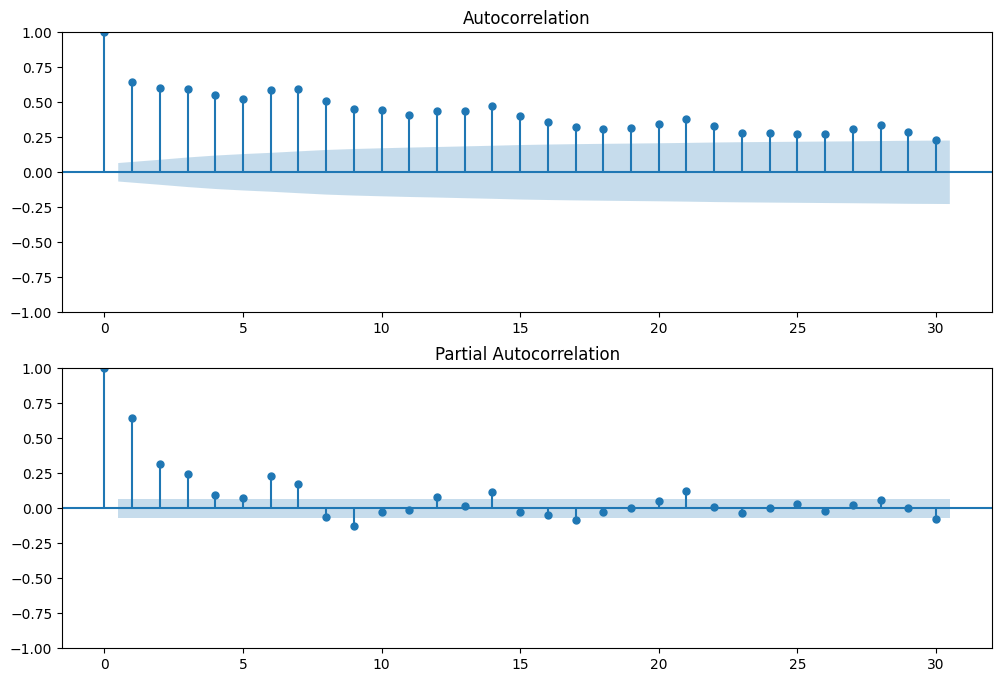

In [14]:
#графики ACF и PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_data, ax=ax1, lags=30)
plot_pacf(train_data, ax=ax2, lags=30)
plt.show()

На графике ACF мы можем видеть сезонность по периодическим линиям за пределами синей площади (зоны значимости).

На графике PACF мы можем видеть наличие автокорреляции после определенных лагов. После лагов, отсуствуют значительные линии, это может указывать на отсуствие или слабую сезонность в данных.

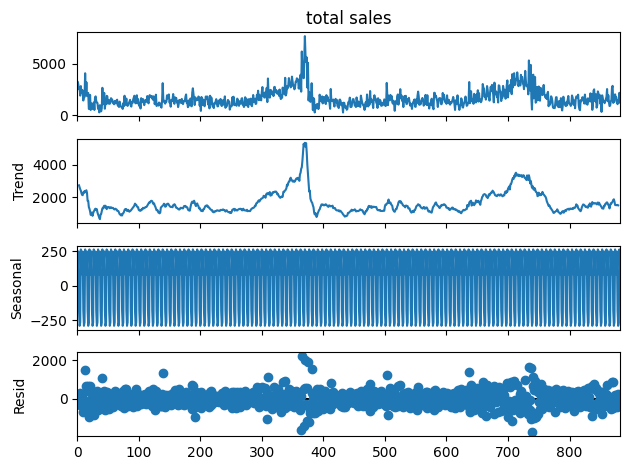

In [18]:
#предположения о сезонности
decomposition = seasonal_decompose(train_data, model='additive', period=7)
decomposition.plot()
plt.show()

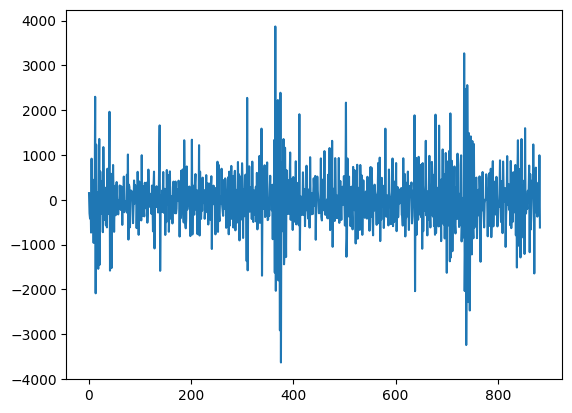

In [19]:
#преобразования для стационарности
diff_train_data = train_data.diff().dropna()
diff_train_data.plot()
plt.show()

ADF статистика: -9.199709081471179
p-value: 2.0174864190054206e-15
(-9.199709081471179, 2.0174864190054206e-15, 19, 862, {'1%': -3.4379589097679975, '5%': -2.86489877693665, '10%': -2.568558467170181}, 13239.852595822787)


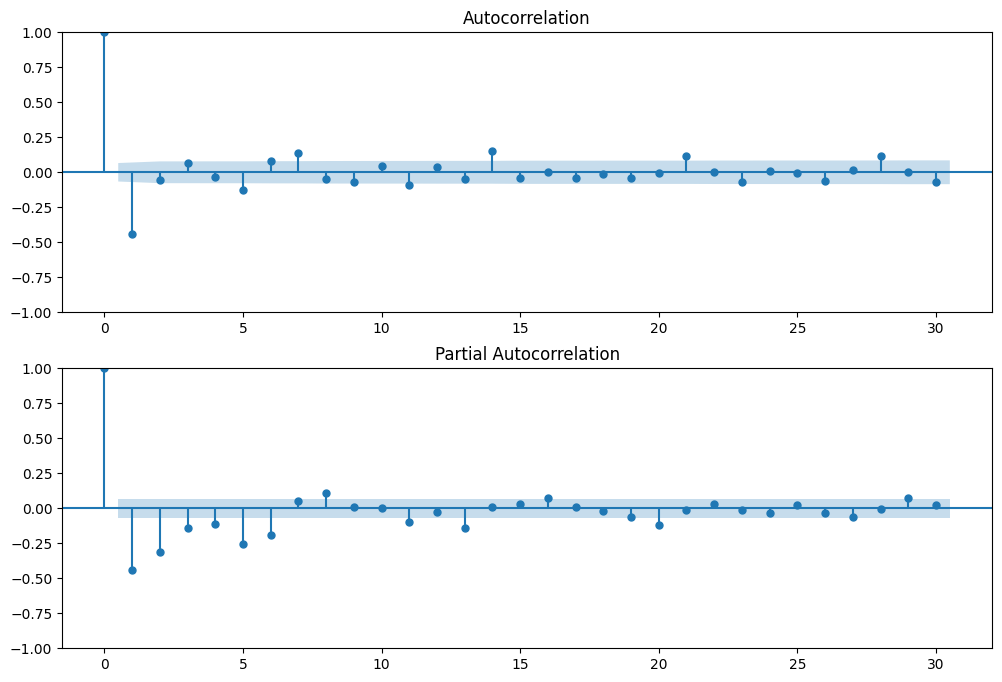

In [20]:
#тест Дики-Фуллера и графики ACF/PACF после преобразования
result = adfuller(diff_train_data)
print("ADF статистика:", result[0])
print("p-value:", result[1])
print(result)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_train_data, ax=ax1, lags=30)
plot_pacf(diff_train_data, ax=ax2, lags=30)
plt.show()

Тест Дики-Фуллера после преобразования данных по-прежнему указывает на то, что временной ряд является стационарным, но уже в большей степени. Статистика Дики-Фуллера (-9.199709081471179) намного меньше критического значения на уровне 1% (-3.4379589097679975). Это означает, что мы можем отвергнуть нулевую гипотезу о том, что временной ряд имеет единичный корень, т.е. не является стационарным с высокой степенью уверенности. Величина p-значения (2.017486419005399e-15) также чрезвычайно мала (намного меньше 0,05), что еще больше говорит о стационарности. Исходя из этого, можно сделать вывод, что преобразование данных успешно удалило единичный корень из временного ряда, и теперь он является стационарным.

На графике ACF мы можем видеть сезонность по периодическим линиям за пределами синей площади (зоны значимости). Поскольку отсуствуют значительные линии за пределами зоны значимости, это указывает на отсуствие сезонности.

На графике PACF мы можем искать наличие автокорреляции после определенных лагов. После лагов, отсуствуют значительные линии, это может указывать на отсуствие сезонность в данных.

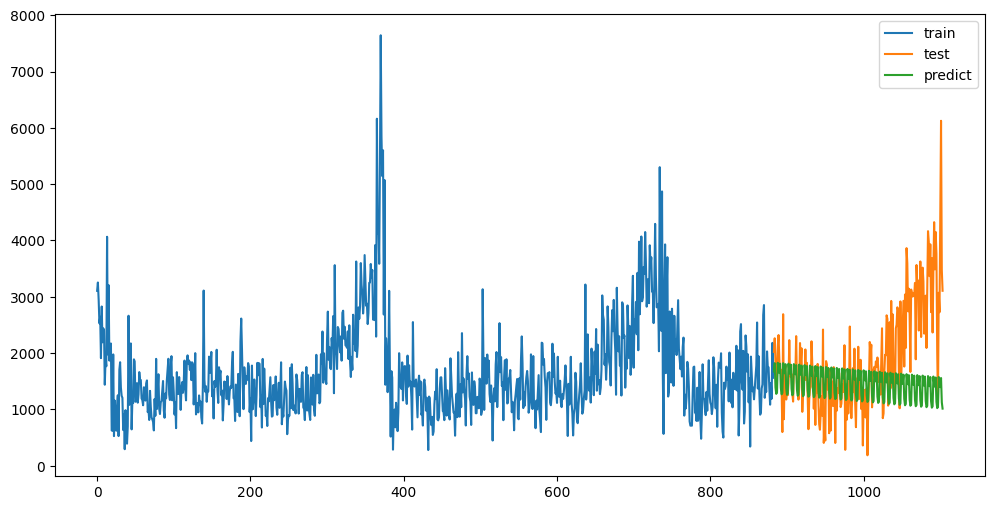

In [21]:
#обучение модели SARIMA
model = sarimax.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fitted_model = model.fit()

#прогнозирование
forecast = fitted_model.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

#визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='train')
plt.plot(test_data.index, test_data, label='test')
plt.plot(forecast_mean.index, forecast_mean, label='predict')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = np.mean((forecast_mean - test_data) ** 2)
print('MSE:', mse)
print('MSE baseline = 971724.8')

MSE: 1088838.4485868292
MSE baseline = 971724.8


Модель SARIMA показывает результат хуже, чем базовая модель MSE

In [23]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d8e8d858c9499fec476398ebed566dbc973b3a620f6fd5ac5b2a6b25a99deb54
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.6 MB/s eta 0:00:00


**Классическая модель**

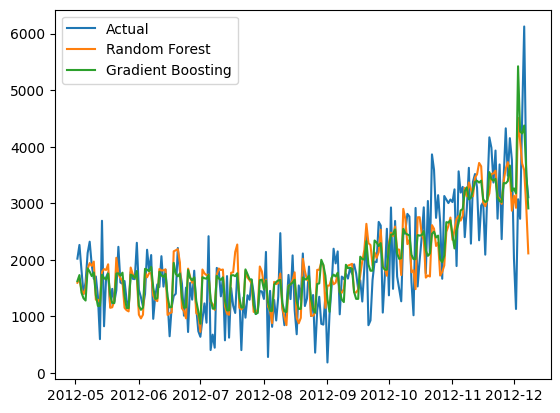

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lime
import lime.lime_tabular
import shap

data = pd.read_csv("online_retail.csv")

#Feature Engineering
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day_of_month'] = data['date'].dt.day
data['day_of_year'] = data['date'].dt.dayofyear

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

#RFR
rf = RandomForestRegressor()
rf.fit(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']], train_data['total sales'])

#GBR
gb = GradientBoostingRegressor()
gb.fit(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']], train_data['total sales'])

#визуализация результатов моделей
plt.plot(test_data['date'], test_data['total sales'], label='Actual')
plt.plot(test_data['date'], rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]), label='Random Forest')
plt.plot(test_data['date'], gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]), label='Gradient Boosting')
plt.legend()
plt.show()

In [29]:
#замеры качества моделей
rf_mse = np.mean((rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']) ** 2)
gb_mse = np.mean((gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']) ** 2)
rf_mae = np.mean(np.abs(rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']))
gb_mae = np.mean(np.abs(gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']))
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")
print('''
MSE SARIMA: 1088838.4485868292
MSE baseline = 971724.8''')

Random Forest MSE: 371028.9851514728
Gradient Boosting MSE: 318983.2914350982

MSE SARIMA: 1088838.4485868292
MSE baseline = 971724.8


Результаты:

Gradient Boosting достигает MSE 319102,833, в то время как Random Forest MSE 367116,539, тем самым превосходя Random Forest. Это говорит нам, что Gradient Boosting лучше справляется с точным прогнозированием.

По сравнению с базовой моделью Random Forest и Gradient Boosting демонстрируют значительные улучшения. Базовая модель имеет MSE 971724,8, что значительно выше, чем MSE, достигнутые Random Forest и Gradient Boosting. Это говорит о том, что Random Forest и Gradient Boosting более эффективны в изучении закономерностей в данных и построении надежных прогнозов.

SARIMA показывает плохие результаты по сравнению с другими моделями по MSE. SARIMA имеет MSE 1088838, которая выше, чем MSE Random Forest и Gradient Boosting. Это говорит о том, что SARIMA может быть не столь подходящей по сравнению с остальными моделями.

**Интерпритация**

In [30]:
# permutation importance
perm = lime.lime_tabular.LimeTabularExplainer(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].values, mode='regression')
perm_importance = perm.explain_instance(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].iloc[0].values, rf.predict).as_map()[1]
print("Permutation Importance:")
for feature, importance in zip(['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year'], perm_importance):
    print(f"{feature}: {importance}")

Permutation Importance:
day_of_week: (4, -308.86982660165694)
month: (0, 208.3789259725227)
year: (2, 137.5654698685263)
day_of_month: (3, 32.01505745906188)
day_of_year: (1, -0.8070319770235932)


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [31]:
# LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].values, mode='regression')
lime_explanation = lime_explainer.explain_instance(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].iloc[0].values, rf.predict)
print("LIME explanation:")
print(lime_explanation.as_list())

LIME explanation:
[('74.00 < 4 <= 160.00', -349.99922426924616), ('1.00 < 0 <= 3.00', 213.76897778095486), ('2 > 2011.00', 81.56326530793902), ('3 <= 8.00', 54.78863968458269), ('3.00 < 1 <= 6.00', 25.545896486459444)]


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


SHAP local interpretation:


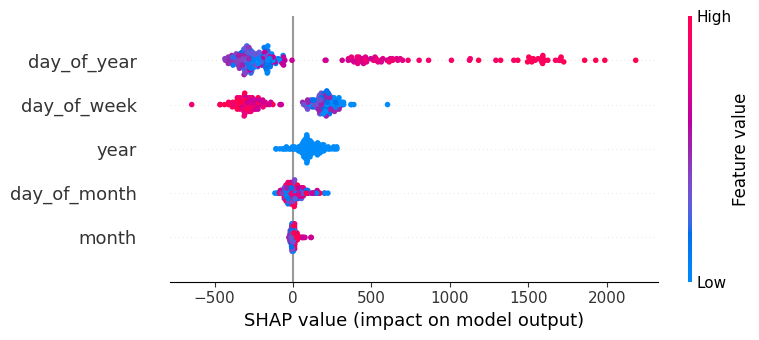

In [32]:
#интерпретация модели с помощью SHAP (локальная интерпретация)
shap_explainer_local = shap.Explainer(rf)
shap_values_local = shap_explainer_local(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
print("SHAP local interpretation:")
shap.summary_plot(shap_values_local, test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])

SHAP global interpretation:


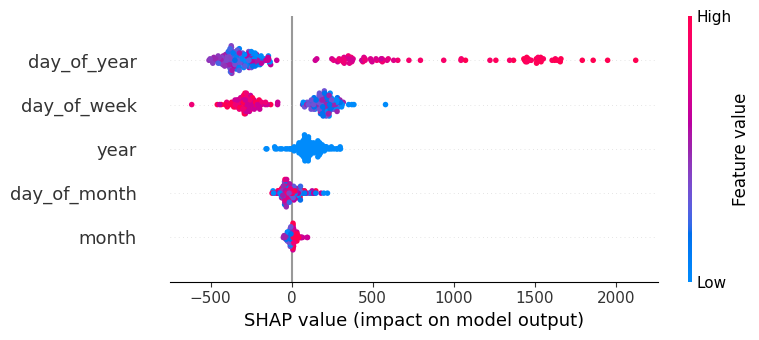

In [33]:
# Интерпретация модели с помощью SHAP (глобальная интерпретация)
shap_explainer_global = shap.Explainer(rf, train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
shap_values_global = shap_explainer_global(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
print("SHAP global interpretation:")
shap.summary_plot(shap_values_global, test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])

Важность перестановки измеряет снижение производительности модели, когда значения одного признака перемешиваются случайным образом. Этот процесс разрушает связь между признаком и целью, поэтому падение производительности указывает на то, насколько модель зависит от признака.

day_of_week: (4, -308.86982660165694) указывает на то, что перестановка дня недели привела к значительному снижению производительности модели, это говорит о том, что этот признак нужный и отрицательно влияет на прогнозы. month: (0, 208.3789259725227) перемешивание месяца улучшает производительность модели, значит, что исходная модель переобучается или отрицательно интерпретирует этот признак. year: (2, 137.5654698685263) признак года при перестановке приводит к повышению производительности, что подчеркивает его положительный вклад в прогнозы модели. day_of_month: (3, 32.01505745906188) перемешивание дня месяца приводит к небольшому повышению производительности, что указывает на положительное влияние. day_of_year: (1, -0.8070319770235932) незначительное снижение производительности при перестановке дня года.

LIME предоставляет локальные объяснения, стремясь объяснить прогнозы по отдельным экземплярам с использованием интерпретируемых моделей.

('74.00 < 4 <= 160.00', -349.99922426924616):  относится к дню недели, учитывая порядок в важности перестановки и значительное отрицательное влияние, аналогичное первой записи, что указывает на диапазон в пределах дня недели, который отрицательно влияет на прогноз.

('1.00 < 0 <= 3.00', 213.76897778095486): соответствует месяцу, демонстрируя, что в определенном диапазоне признак месяца оказывает значительное положительное влияние на прогноз модели.